**CUSTOMER SEGMENTATION ( AGE VS INCOME )**

**WHY GO FOR AGE VS INCOME**

Often positively related (older = more work experience = higher income).

But exceptions exist (young professionals with high salaries).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from google.colab import files
import pandas as pd
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
df = pd.read_csv("Mall_Customers.csv")

print("First 5 rows of data:")
print(df.head())

First 5 rows of data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
X = df[["Spending Score (1-100)", "Age"]]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

Plot Cluster

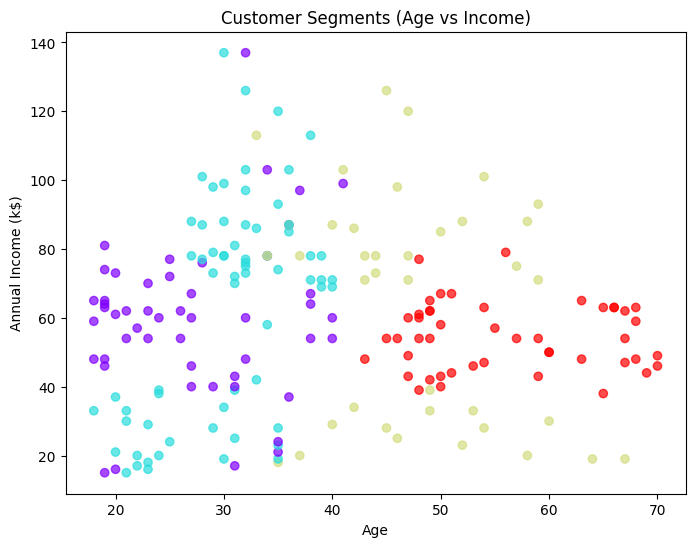

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(df["Age"], df["Annual Income (k$)"],
            c=df["Cluster"], cmap="rainbow", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.title("Customer Segments (Age vs Income)")
plt.show()

Bar Chart


Cluster Profiles (Age vs Income):
               Age  Annual Income (k$)
Cluster                               
0        27.220000           59.620000
1        30.292308           63.830769
2        47.605263           63.789474
3        55.978723           54.425532


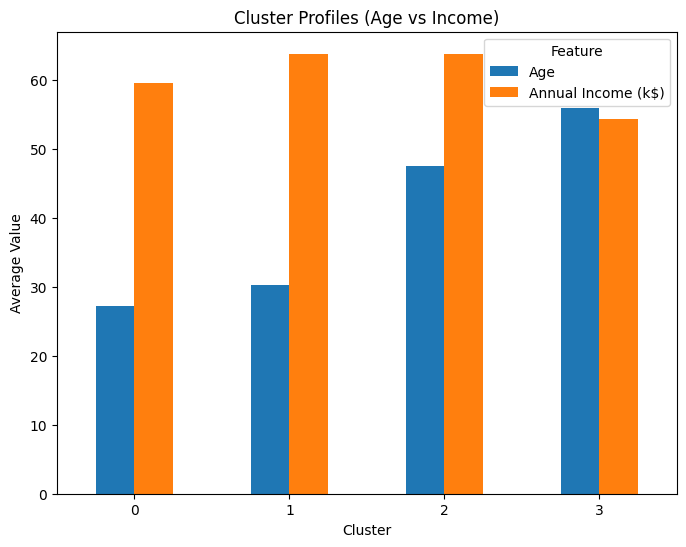

In [8]:
cluster_summary = df.groupby("Cluster")[["Age", "Annual Income (k$)"]].mean()
print("Cluster Profiles (Age vs Income):")
print(cluster_summary)
cluster_summary.plot(kind="bar", figsize=(8,6))
plt.title("Cluster Profiles (Age vs Income)")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.legend(title="Feature")
plt.show()

Box Chart

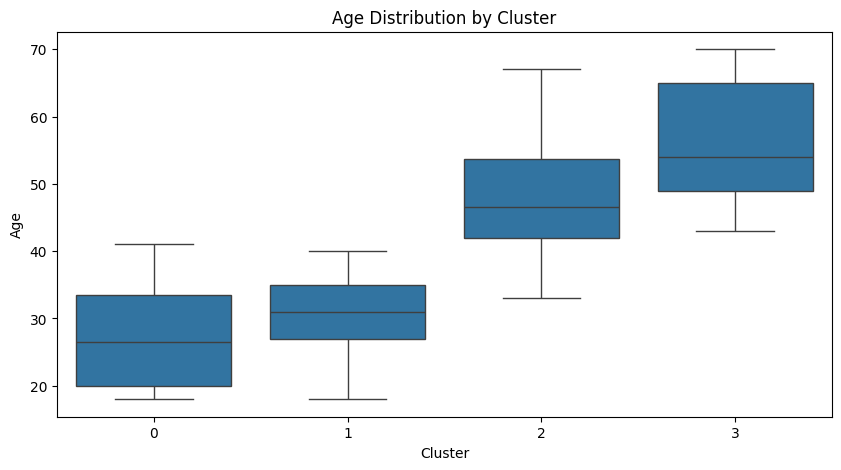

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Cluster", y="Age", data=df)
plt.title("Age Distribution by Cluster")
plt.show()

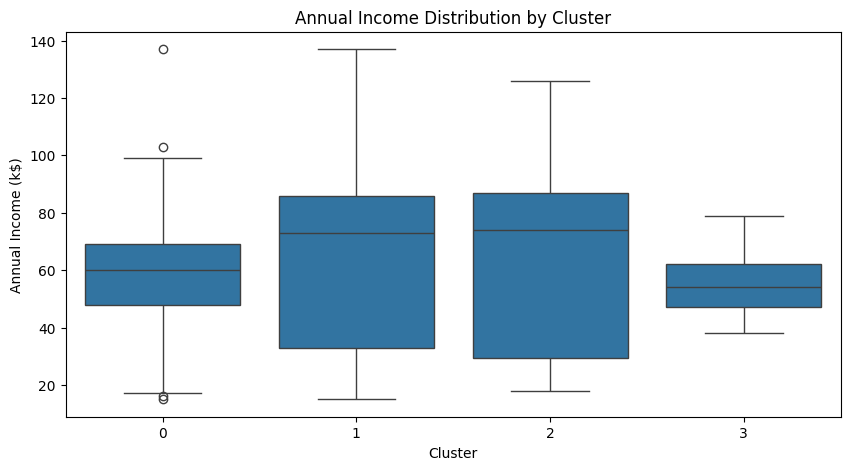

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Cluster", y="Annual Income (k$)", data=df)
plt.title("Annual Income Distribution by Cluster")
plt.show()

In [11]:
df.to_excel("age_income_clusters.xlsx", index=False)
files.download("age_income_clusters.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>